<a href="https://colab.research.google.com/github/NaraaBold/DiverNaraa/blob/main/Fuji_downhill_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print (fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


[Problem 1]

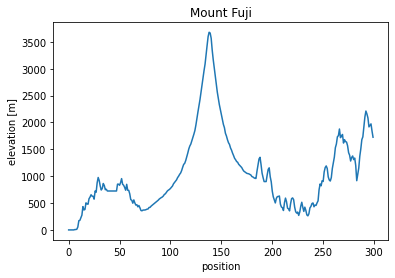

In [3]:
import matplotlib.pyplot as plt

plt.xlabel("position")
plt.ylabel("elevation [m]")
plt.title("Mount Fuji")
plt.plot(fuji[:,0], fuji[:,3])
plt.show()

[Problem 2]

In [4]:
def calculate_gradient_at_point(point):
  if point > 0:
    gradient = (fuji[point,3] - fuji[point-1,3])/ (fuji[point,0] - fuji[point-1,0])
    return gradient
  else:
    print("Error!")
    return 0

print (calculate_gradient_at_point(135))

178.42999999999984


[Problem 3]

In [23]:
def calculate_destination_point(cur_point, alpha = 0.2):
  des_point = cur_point-alpha*calculate_gradient_at_point(cur_point)
  if des_point>0:
    return int (des_point)
  else:
    return 0

print (calculate_destination_point(136))


102


[Problem 4]

In [24]:
def go_down(get_point, alpha=0.2):
  next_point = get_point
  point_list = []
  while (next_point>0):
    next_point = calculate_destination_point(next_point,alpha)
    point_list.append(next_point)
  return point_list

#to exit from loop following function is declared
def go_down2(get_point, alpha=0.2):
  next_point = get_point
  point_list = []
  while (get_point>0):
    next_point = calculate_destination_point(get_point, alpha)
    point_list.append(next_point)
    get_point=get_point-1
  return point_list

#points = go_down(136)
points = go_down2(136)
print (points)

[102, 99, 110, 104, 107, 103, 102, 105, 105, 102, 101, 104, 110, 111, 108, 108, 112, 107, 102, 103, 102, 104, 109, 102, 99, 101, 104, 102, 102, 98, 101, 99, 98, 94, 97, 96, 96, 96, 94, 91, 90, 92, 88, 89, 89, 88, 87, 84, 84, 83, 83, 81, 80, 80, 78, 76, 79, 73, 77, 75, 74, 74, 73, 70, 73, 80, 78, 64, 76, 65, 74, 76, 51, 73, 64, 82, 72, 59, 80, 35, 66, 63, 57, 74, 37, 41, 54, 49, 22, 47, 46, 45, 44, 43, 42, 41, 40, 39, 44, 35, 51, 42, 15, 27, 46, 51, 41, 9, 0, 31, 0, 35, 24, 28, 13, 14, 0, 20, 21, 0, 14, 27, 0, 3, 1, 9, 0, 0, 7, 6, 4, 5, 4, 3, 2, 1]


[Problem 5]

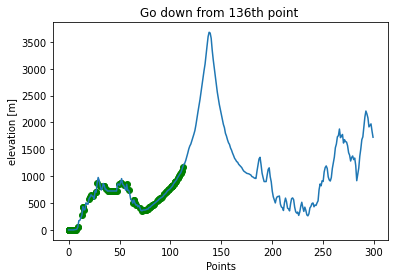

In [20]:
plt.xlabel("Points")
plt.ylabel("elevation [m]")
plt.title("Go down from 136th point ")
plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(points, fuji[points,3], c= 'g')
plt.show()

[Problem 6 and 7]

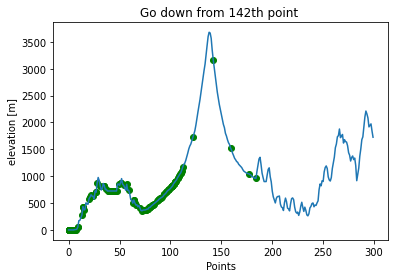

In [21]:
points1 = go_down2(142)
plt.xlabel("Points")
plt.ylabel("elevation [m]")
plt.title("Go down from 142th point ")
plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(points1, fuji[points1,3], c= 'g')
plt.show()

[Problem 8]

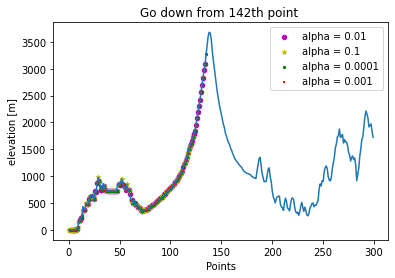

In [45]:
points1 = go_down2(136, 0.0001)
points2 = go_down2(136, 0.001)
points3 = go_down2(136, 0.01)
points4 = go_down2(136, 0.1)

plt.xlabel("Points")
plt.ylabel("elevation [m]")
plt.title("Go down from 136th point ")
plt.plot(fuji[:,0], fuji[:,3])

plt.scatter(points3, fuji[points3,3], c= 'm', s= 20, label='alpha = 0.01')
plt.scatter(points4, fuji[points4,3], c= 'y', s = 20, marker = '*', label='alpha = 0.1')
plt.scatter(points1, fuji[points1,3], c= 'g', s = 5, label='alpha = 0.0001')
plt.scatter(points2, fuji[points2,3], c= 'r', s = 5, marker='+',label='alpha = 0.001')
plt.legend(loc= 'upper right')
plt.show()
